In [3]:
# -*- coding: utf-8 -*-
"""
Created on Sat Oct  1 09:13:37 2022

@author: Yash Pungaliya
"""

#Singualrity :- the column which have 85% or more same value do not  predictive values
#Steps in EDA : 1)Correlation 2)Outliers using Boxplot 3)Normalization check using histogram 4)Checking and fixing null values
#Linear Regression
#Dataset : - Concrete 

#import libraries
import pandas as pd 
import numpy as np 
import statsmodels.api as sm  #OLS model
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats  as stats
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn import preprocessing # data transformation
from sklearn.metrics import mean_squared_error



In [4]:
#read data
filename = "C:/Users/Yash Pungaliya/Desktop/class/Linear Regression/concrete.csv"
conc = pd.read_csv(filename)
print (conc.head)



<bound method NDFrame.head of       cementcomp   slag  flyash  water  superplastisizer  coraseaggr  \
0          540.0    0.0     0.0  162.0               2.5      1040.0   
1          540.0    0.0     0.0  162.0               2.5      1055.0   
2          332.5  142.5     0.0  228.0               0.0       932.0   
3          332.5  142.5     0.0  228.0               0.0       932.0   
4          198.6  132.4     0.0  192.0               0.0       978.4   
...          ...    ...     ...    ...               ...         ...   
1025       276.4  116.0    90.3  179.6               8.9       870.1   
1026       322.2    0.0   115.6  196.0              10.4       817.9   
1027       148.5  139.4   108.6  192.7               6.1       892.4   
1028       159.1  186.7     0.0  175.6              11.3       989.6   
1029       260.9  100.5    78.3  200.6               8.6       864.5   

      finraggr  age    CCS  
0        676.0   28  79.99  
1        676.0   28  61.89  
2        594.0  27

In [5]:
conc.isnull().sum()
conc[conc==0].count()

#summary of the data
conc.describe()

#check for outliers in age
conc.age.describe()

#extract 'Y' variable from 
Y = "CCS"
features = list(conc.columns)
features.remove(Y)
features


['cementcomp',
 'slag',
 'flyash',
 'water',
 'superplastisizer',
 'coraseaggr',
 'finraggr',
 'age']

In [6]:
trainx,testx,trainY,testY = train_test_split(conc.drop(Y,1),conc[Y],test_size=0.25)

C:\Users\YASHPU~1\AppData\Local\Temp/ipykernel_1420/4083608486.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  trainx,testx,trainY,testY = train_test_split(conc.drop(Y,1),conc[Y],test_size=0.25)


In [7]:
print("trainx={} , trainY = {}".format(trainx.shape,trainY.shape))
print("testX={} , testY = {}".format(testx.shape,testY.shape))


trainx=(772, 8) , trainY = (772,)
testX=(258, 8) , testY = (258,)


In [8]:
#Build The Models 
#1)OLS
model_lr = sm.OLS(trainY,trainx).fit()


In [9]:
#2)Decision Tree Regressor
m_dt = dtr(criterion="mse",min_samples_leaf=3,max_depth=6).fit(trainx,trainY)

In [10]:
#Prediction
#1)OLS
p_lr = np.round(model_lr.predict(testx),2)
p_lr

237    30.05
455    37.47
511    55.57
676    24.30
654    15.92
       ...  
505    51.82
271    28.47
955    25.99
73     55.80
575    16.28
Length: 258, dtype: float64

In [11]:
#2)DTR
p_dt = np.round(m_dt.predict(testx),2)
p_dt

array([38.38, 46.6 , 72.23, 13.42, 25.47, 26.26, 45.47, 41.65,  9.42,
       35.22, 26.26, 33.19, 33.19, 15.09, 24.57, 38.38, 51.76, 32.83,
       38.38, 13.42, 25.47, 51.76, 25.47, 27.07, 23.07, 53.62, 62.48,
       38.38, 25.47, 64.53, 32.52, 37.68, 49.62, 35.22, 32.83, 49.62,
       49.62, 49.62, 64.12, 24.57, 24.26, 33.19, 38.38, 38.38, 27.29,
       32.83, 22.24, 51.76, 32.83, 32.83, 43.11, 64.12, 38.38, 36.58,
       43.11, 45.62, 13.42, 35.22, 38.38, 38.38, 49.62, 32.83, 25.47,
       46.6 , 13.42, 14.92, 38.38, 22.24, 38.38, 14.92, 53.62, 51.76,
       53.62, 52.73, 13.42, 37.68, 46.6 , 32.66, 32.83,  5.33, 34.89,
       27.29, 14.92, 64.53, 32.83, 32.66, 64.53, 32.83, 32.83, 53.62,
       13.42, 72.23, 32.49, 13.42, 33.19, 25.47, 26.26, 14.92, 36.58,
       51.76, 13.42, 38.38, 32.83, 34.89, 27.29, 64.53, 32.66, 13.42,
       22.01, 24.57, 64.12, 46.6 , 20.52, 13.42, 72.23, 38.38, 51.07,
       32.83, 25.47, 32.83,  5.33, 35.22, 51.76, 33.19, 32.83, 32.83,
       34.63, 32.66,

In [12]:
def getErr(act,pred):
    mse= np.round(mean_squared_error(act,pred),4)
    rmse= np.round(np.sqrt(mse),4)
    
    return(mse,rmse)

mse_lr,rmse_lr = getErr(testY,p_lr)
mse_dtr,rmse_dtr = getErr(testY,p_dt)

In [13]:
print("RMSE\n\t OLS ={}\n\t DT = {}".format(rmse_lr,rmse_dtr))

RMSE
	 OLS =10.6
	 DT = 7.5201


In [14]:
#DataFrame to store actual CCS and predicted CCS from two model
results =pd.DataFrame({'actual':testY , 'pred_OLS ':p_lr,'pred_dt':p_dt})

In [15]:
print(results)

     actual  pred_OLS   pred_dt
237   47.13      30.05    38.38
455   51.26      37.47    46.60
511   65.70      55.57    72.23
676   15.75      24.30    13.42
654   24.29      15.92    25.47
..      ...        ...      ...
505   37.92      51.82    34.63
271   33.73      28.47    46.60
955   32.25      25.99    32.83
73    36.30      55.80    37.68
575   17.58      16.28    22.24

[258 rows x 3 columns]


In [16]:
# plot the best fit line of Model 1
def plotBestFitLine(actual,pred,model,err):
    sns.regplot(actual,pred,marker='.',color='yellow', line_kws={'color':'red'},ci=None)
    plt.title("Best Fit Line for model " + model + ". RMSE = " + str(round(np.sqrt(err),3)))

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


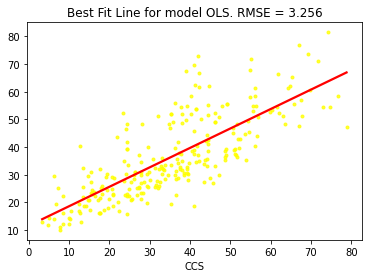

In [17]:
plotBestFitLine(testY,p_lr,"OLS",rmse_lr)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


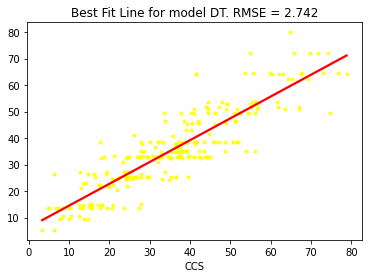

In [18]:
plotBestFitLine(testY,p_dt,"DT",rmse_dtr)